#### In this Notebbo we clean the data from duplicates , Handle missing values and edit the columns values like the {age} column

In [1]:
# Constants
DATA_PATH = '../data/raw/train_users_2.csv'
EXPORT_PATH = "../data/processed/1_preprocessed_df.pkl"

In [19]:
# Load packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import pickle

In [20]:
# Read Data 
raw_df = pd.read_pickle(EXPORT_PATH)

In [21]:
df = raw_df.copy()

### 01 Checking the Duplicates and Drop them

In [27]:
df.duplicated().sum()

0

#### we don't have any duplicates

#### 02 Finding Null Values 

In [22]:
df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [23]:
df.isnull().sum()/len(df)

id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         0.583473
gender                     0.000000
age                        0.412226
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.028414
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.000000
country_destination        0.000000
dtype: float64

<AxesSubplot: >

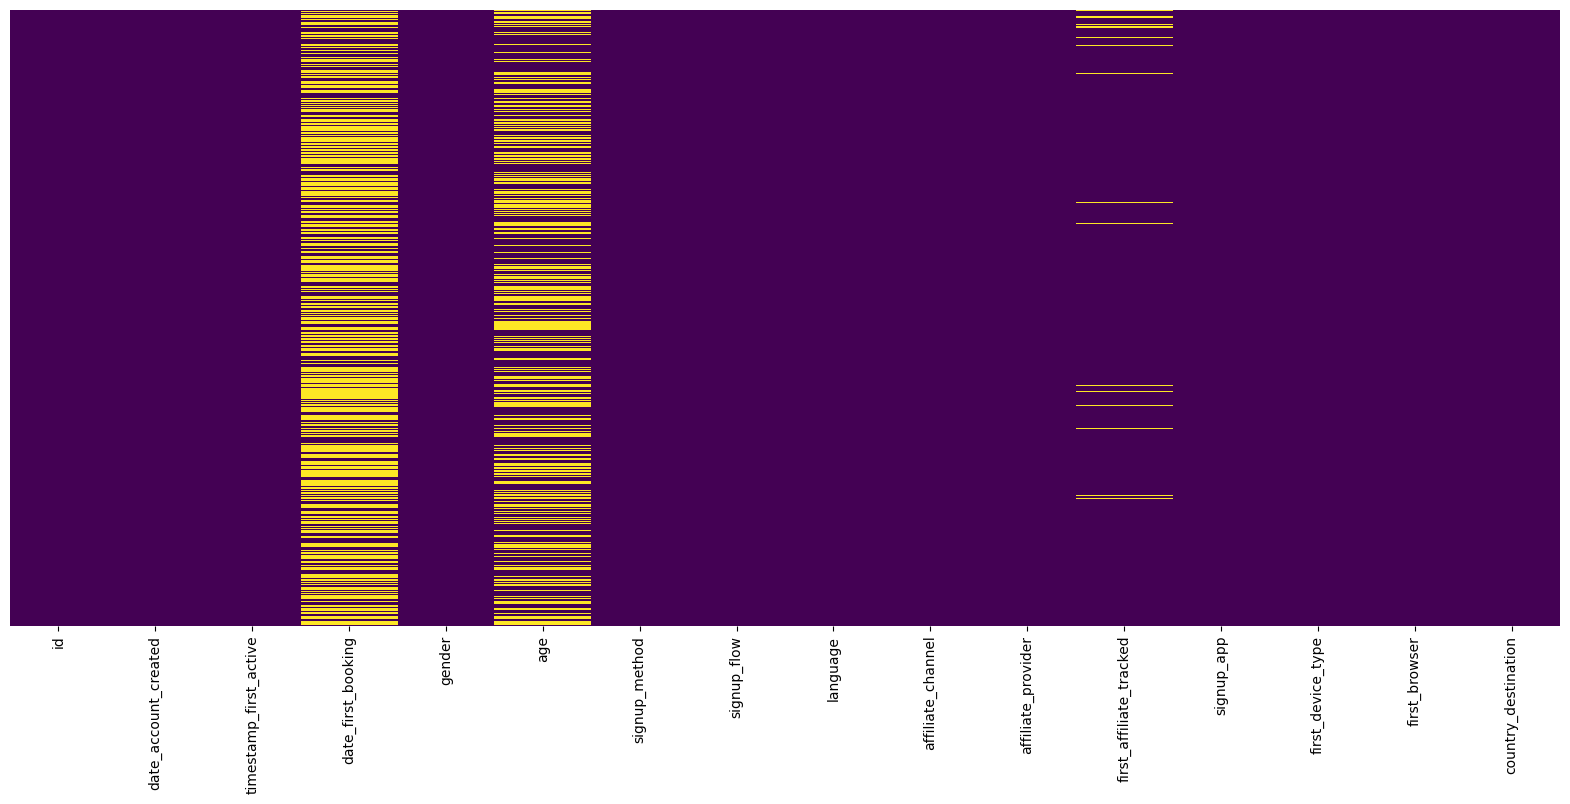

In [24]:
#Null value Analysis percejtage
plt.figure(figsize = (20,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [25]:
df_length = len(df)

print('Date first booking null %% = ',(df['date_first_booking'].isnull().sum()/df_length*100),'%\n')
print('Age null %% = ',(df['age'].isnull().sum()/df_length*100),'%\n')
print('first_affiliate_tracked null %% = ',(df['first_affiliate_tracked'].isnull().sum()/df_length*100),'%\n')

Date first booking null %% =  58.34734904029496 %

Age null %% =  41.222575673105304 %

first_affiliate_tracked null %% =  2.84140153946339 %

